# GRIP- The Sparks Foundation


# Data Science & Business Analytics internship


# Task 1-Predict the percentage scored by a student based on the no. of study hours.

# By- Sudity Khushi

Here,we will predict the percentage of marks of students based on the number of study hours using python.

# Importing libraries

In [22]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

%matplotlib inline

# Readind data from dataset 

In [23]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualizing the data for insights

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the graph for the data given in dataset 

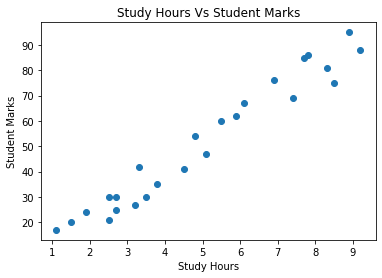

In [26]:
x=data.Hours
y=data.Scores

plt.scatter(x,y)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Study Hours Vs Student Marks')
plt.show()

# Cleaning the data

In [27]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Split the dataset 

In [28]:
x=data.drop('Scores',axis='columns')
y=data.drop('Hours',axis='columns')
print(x.shape,y.shape)

(25, 1) (25, 1)


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [30]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (20, 1)
shape of Y Train (20, 1)
shape of X Test (5, 1)
shape of Y Test (5, 1)


# Training the algorithm

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

print('Trained the algorithm')

Trained the algorithm


# Plotting the regression line

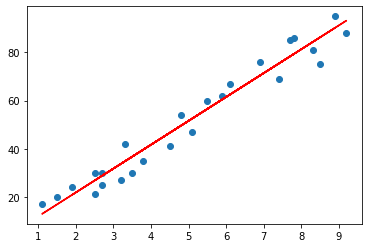

In [32]:
m=lr.coef_
c=lr.intercept_

reg_line= m *X_train + c

plt.scatter(x,y)
plt.plot(X_train, reg_line, color='red')
plt.show()

# Testing our own Data

In [33]:
hours= 9.52
print('Predicted score for 9.52 hours is:' ,lr.predict([[hours]])[0][0].round(2))

Predicted score for 9.52 hours is: 96.37


# Comparing the Actual Vs Predicted

In [34]:
y_pred=lr.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [35]:
df= pd.DataFrame(np.c_[Y_test,y_pred],columns=['Actual Score','Predicted Score'])
df

,Actual Score,Predicted Score
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


# Evaluating the model

In [36]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error',metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_absolute_error(Y_test,y_pred)))

Mean Absolute Error 4.18385989900298
Mean Squared Error 21.598769307217413
Root Mean Squared Error 2.0454485813637504


In [37]:
print('Accuracy of the Model:', lr.score(X_test,Y_test)* 100)

Accuracy of the Model: 94.54906892105355
